## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

## Accuracy

### Single

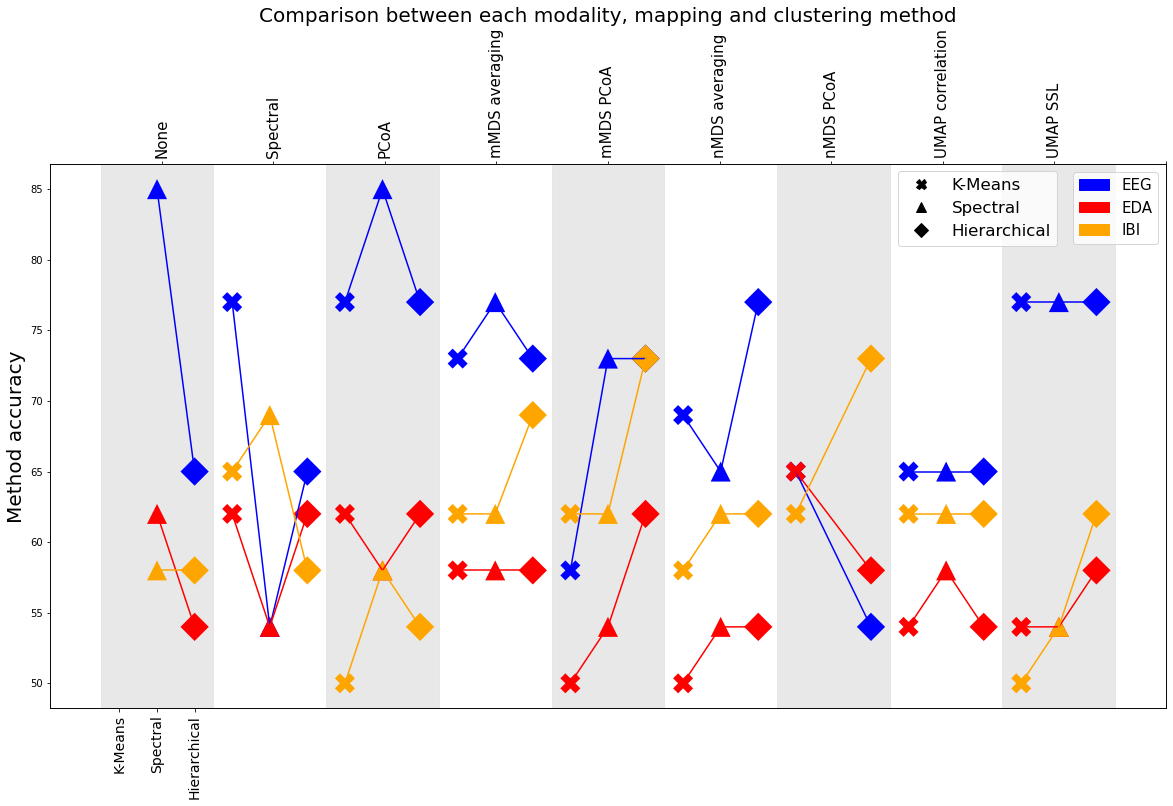

In [2]:
# Read table
results = np.genfromtxt(os.path.join('Table accuracy.csv'),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)

# Single modality results
single = results[2:,2:5]
#print(single)

# Multiview
#print(results[2:,4:8])

# Plot only results from working methods
markerList = ['X','^','D','v','1']
colorList = ['blue','red','orange']
clusteringList = ['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means']
nbClust = 3
fig, ax = plt.subplots(figsize=(20, 10))

for mod in range(3):
    for i in range(9):
        x = []
        y = []
        if (i%2==0):
            plt.axvspan(i*nbClust-0.5, (i+1)*nbClust-0.5, alpha=0.5, color='0.9',zorder=1)
        for j in range(nbClust):
            if (single[i*5+j,mod] != 0):
                x.append(i*nbClust+j)
                y.append(single[i*5+j,mod])
                plt.scatter(x[-1],y[-1],marker=markerList[j],color=colorList[mod],s=400, edgecolors='none',zorder=3)
            #else:
                #plt.plot([i*nbClust+j,i*nbClust+j],[50,np.max(single)],color='grey',linewidth=10,zorder=2)
        plt.plot(x,y,color=colorList[mod],zorder=4)
        #plt.plot([(i+1)*nbClust-0.5,(i+1)*nbClust-0.5],[50,np.max(single)],color='black',linewidth=3,linestyle='--')

# Clustering labels
#plt.xticks(np.arange(0,9*10))
#ax.set_xticklabels(9*['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means'], rotation=90)
plt.xticks(np.arange(0,nbClust),size=14)
ax.set_xticklabels(clusteringList[:nbClust], rotation=90)

# Mapping labels
ax2 = ax.twiny()
ax2.xaxis.set_label_position("bottom")
plt.xticks(np.linspace(0,9*nbClust,10)+3,size=15)
ax2.set_xticklabels(['None','Spectral','PCoA','mMDS averaging','mMDS PCoA','nMDS averaging','nMDS PCoA','UMAP correlation','UMAP SSL'], rotation=90)

# Add legend + title

EEG = mpatches.Patch(color='blue', label='EEG')
EDA = mpatches.Patch(color='red', label='EDA')
IBI = mpatches.Patch(color='orange', label='IBI')
ax.set_ylabel('Method accuracy',size=20)

legendMarker = []
for i in range(nbClust):
    legendMarker.append(Line2D([], [], color='black', marker=markerList[i], linestyle='None',
                              markersize=10, label=clusteringList[i]))

legend1 = plt.legend(handles=legendMarker,loc=(0.67+0.03*nbClust,0.85),prop={'size': 50/nbClust})

plt.legend(handles=[EEG,EDA,IBI],prop={'size': 15})
plt.gca().add_artist(legend1)
plt.title("Comparison between each modality, mapping and clustering method",size=20)
plt.savefig(os.path.join('figures','singleResultsAccuracy.png'),bbox_inches='tight')

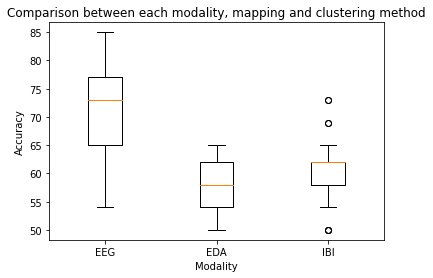

In [3]:
# Boxplot
cleanedResults = []
for i in range(2,5):
    tmp = results[~np.isnan(results[:,i]),i]
    cleanedResults.append(tmp[tmp>0])

fig, ax = plt.subplots()
plt.boxplot(cleanedResults)
ax.set_xticklabels(['EEG','EDA','IBI'])
ax.set_xlabel('Modality')
ax.set_ylabel('Accuracy')
plt.title("Comparison between each modality, mapping and clustering method")
plt.savefig(os.path.join('figures','singleBoxplots.png'),bbox_inches='tight')

### Multi

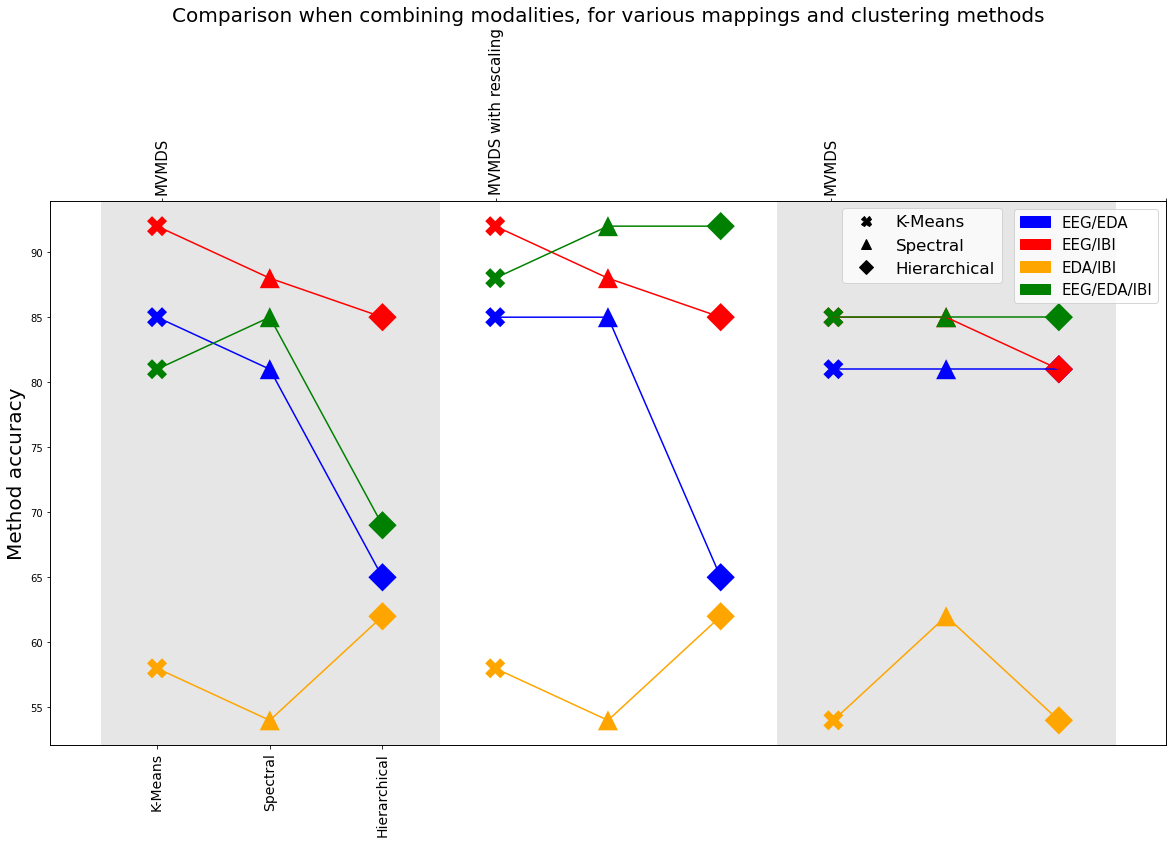

In [4]:
# Read table
results = np.genfromtxt(os.path.join('Table accuracy.csv'),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)

# Single modality results
single = results[2:,2:5]
#print(single)

# Multiview
multi = results[2:,5:9]

# Plot only results from working methods
markerList = ['X','^','D','v','1']
colorList = ['blue','red','orange','green']
clusteringList = ['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means']
nbClust = 3
fig, ax = plt.subplots(figsize=(20, 10))

for mod in range(4):
    for i in range(3):
        x = []
        y = []
        if (i%2==0):
            plt.axvspan(i*nbClust-0.5, (i+1)*nbClust-0.5, alpha=0.5, color='0.9',zorder=1)
        for j in range(nbClust):
            if (multi[i*5+j,mod] != 0):
                x.append(i*nbClust+j)
                y.append(multi[i*5+j,mod])
                plt.scatter(x[-1],y[-1],marker=markerList[j],color=colorList[mod],s=400, edgecolors='none',zorder=3)
            #else:
                #plt.plot([i*nbClust+j,i*nbClust+j],[50,np.max(multi)],color='grey',linewidth=10,zorder=2)
        plt.plot(x,y,color=colorList[mod],zorder=4)
        #plt.plot([(i+1)*nbClust-0.5,(i+1)*nbClust-0.5],[50,np.max(multi)],color='black',linewidth=3,linestyle='--')

# Clustering labels
#plt.xticks(np.arange(0,9*10))
#ax.set_xticklabels(9*['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means'], rotation=90)
plt.xticks(np.arange(0,nbClust),size=14)
ax.set_xticklabels(clusteringList[:nbClust], rotation=90)

# Mapping labels
ax2 = ax.twiny()
ax2.xaxis.set_label_position("bottom")
plt.xticks(np.linspace(0,9*nbClust,4)+3,size=15)
ax2.set_xticklabels(['MVMDS','MVMDS with rescaling','MVMDS'], rotation=90)

# Add legend + title
EEG_EDA = mpatches.Patch(color='blue', label='EEG/EDA')
EEG_IBI = mpatches.Patch(color='red', label='EEG/IBI')
EDA_IBI = mpatches.Patch(color='orange', label='EDA/IBI')
EEG_EDA_IBI = mpatches.Patch(color='green', label='EEG/EDA/IBI')
ax.set_ylabel('Method accuracy',size=20)

legendMarker = []
for i in range(nbClust):
    legendMarker.append(Line2D([], [], color='black', marker=markerList[i], linestyle='None',
                              markersize=10, label=clusteringList[i]))

legend1 = plt.legend(handles=legendMarker,loc=(0.62+0.03*nbClust,0.85),prop={'size': 50/nbClust})

plt.legend(handles=[EEG_EDA,EEG_IBI,EDA_IBI,EEG_EDA_IBI],prop={'size': 15})
plt.gca().add_artist(legend1)
plt.title("Comparison when combining modalities, for various mappings and clustering methods",size=20)
plt.savefig(os.path.join('figures','multiResultsAccuracy.png'),bbox_inches='tight')

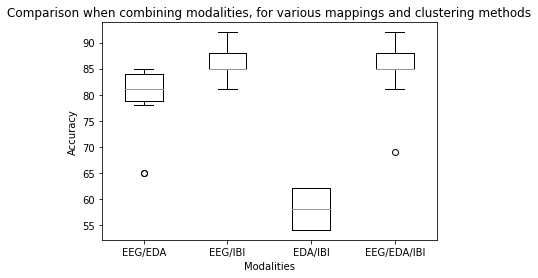

In [5]:
# Boxplot
cleanedResults = []
for i in range(5,9):
    tmp = results[~np.isnan(results[:,i]),i]
    cleanedResults.append(tmp[tmp>0])

fig, ax = plt.subplots()
plt.boxplot(cleanedResults)
ax.set_xlabel('Modalities')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(['EEG/EDA','EEG/IBI','EDA/IBI','EEG/EDA/IBI'])
plt.title("Comparison when combining modalities, for various mappings and clustering methods")
plt.savefig(os.path.join('figures','multiBoxplots.png'),bbox_inches='tight')

## Silhouette

### Single

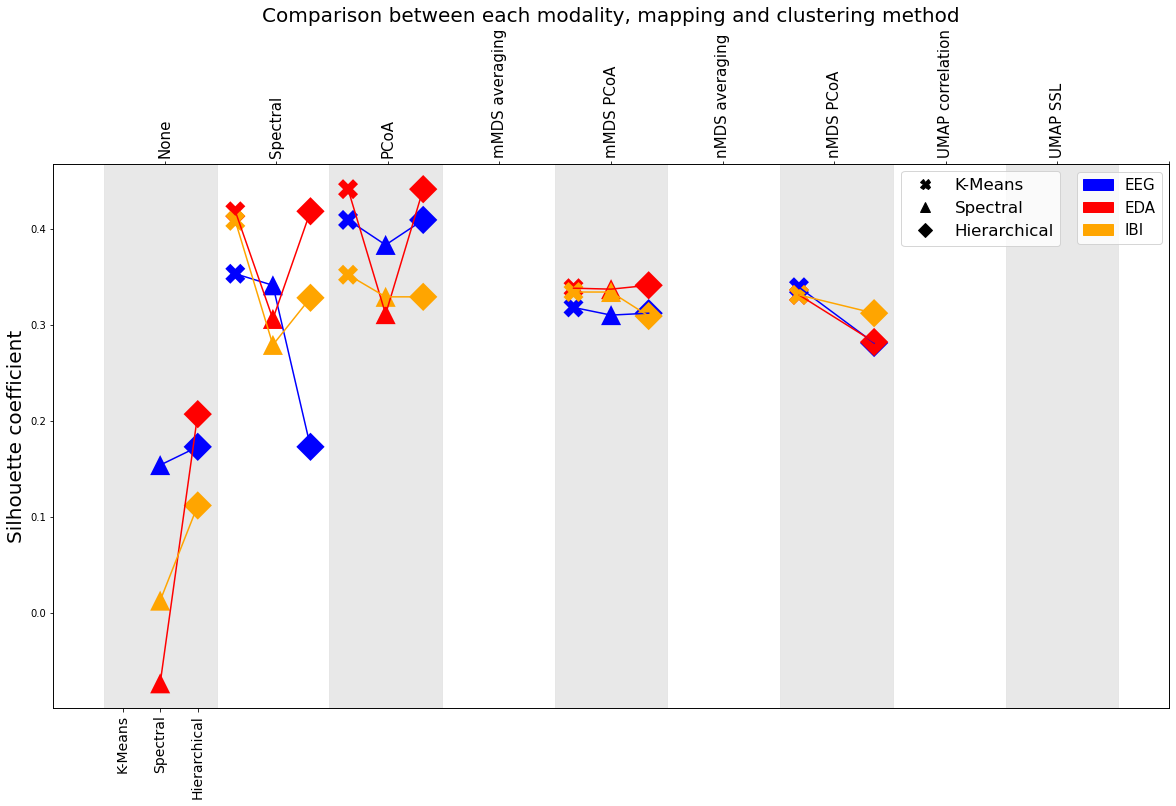

In [6]:
# Read table
results = np.genfromtxt(os.path.join('Table silhouette.csv'),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)

# Single modality results
single = results[2:,2:5]
#print(single)

# Multiview
#print(results[2:,4:8])

# Plot only results from working methods
markerList = ['X','^','D','v','1']
colorList = ['blue','red','orange']
clusteringList = ['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means']
nbClust = 3
fig, ax = plt.subplots(figsize=(20, 10))

for mod in range(3):
    for i in range(9):
        x = []
        y = []
        if (i%2==0):
            plt.axvspan(i*nbClust-0.5, (i+1)*nbClust-0.5, alpha=0.5, color='0.9',zorder=1)
        for j in range(nbClust):
            if (single[i*5+j,mod] != 0):
                x.append(i*nbClust+j)
                y.append(single[i*5+j,mod])
                plt.scatter(x[-1],y[-1],marker=markerList[j],color=colorList[mod],s=400, edgecolors='none',zorder=3)
            #else:
                #plt.plot([i*nbClust+j,i*nbClust+j],[0,np.max(single)],color='grey',linewidth=10,zorder=2)
        plt.plot(x,y,color=colorList[mod],zorder=4)
        #plt.plot([(i+1)*nbClust-0.5,(i+1)*nbClust-0.5],[50,np.max(single)],color='black',linewidth=3,linestyle='--')

# Clustering labels
#plt.xticks(np.arange(0,9*10))
#ax.set_xticklabels(9*['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means'], rotation=90)
plt.xticks(np.arange(0,nbClust),size=14)
ax.set_xticklabels(clusteringList[:nbClust], rotation=90)

# Mapping labels
ax2 = ax.twiny()
ax2.xaxis.set_label_position("bottom")
plt.xticks(np.linspace(0,9*nbClust,10)+3,size=15)
ax2.set_xticklabels(['None','Spectral','PCoA','mMDS averaging','mMDS PCoA','nMDS averaging','nMDS PCoA','UMAP correlation','UMAP SSL'], rotation=90)

# Add legend + title
EEG = mpatches.Patch(color='blue', label='EEG')
EDA = mpatches.Patch(color='red', label='EDA')
IBI = mpatches.Patch(color='orange', label='IBI')
ax.set_ylabel('Silhouette coefficient',size=20)

legendMarker = []
for i in range(nbClust):
    legendMarker.append(Line2D([], [], color='black', marker=markerList[i], linestyle='None',
                              markersize=10, label=clusteringList[i]))

legend1 = plt.legend(handles=legendMarker,loc=(0.67+0.03*nbClust,0.85),prop={'size': 50/nbClust})

plt.legend(handles=[EEG,EDA,IBI],prop={'size': 15})
plt.gca().add_artist(legend1)
plt.title("Comparison between each modality, mapping and clustering method",size=20)
plt.savefig(os.path.join('figures','singleResultsSilhouette.png'),bbox_inches='tight')

### Multi

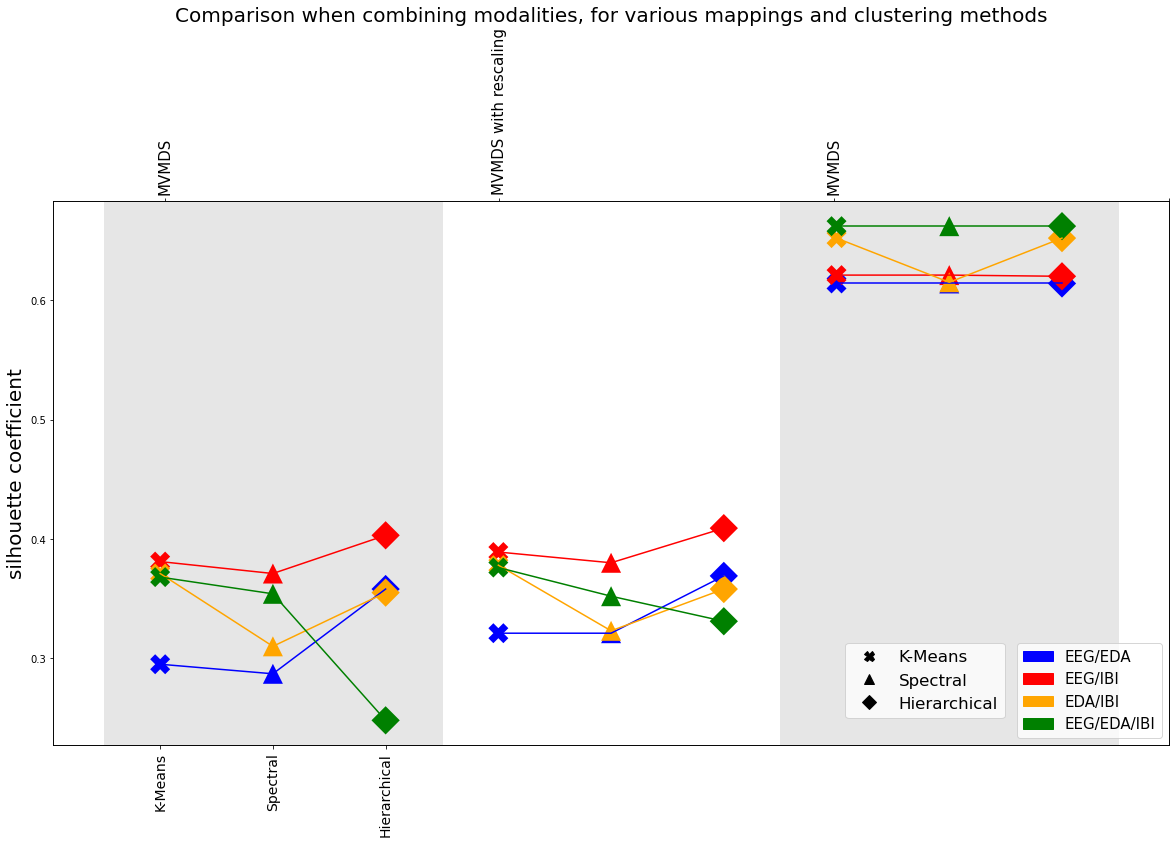

In [7]:
# Read table
results = np.genfromtxt(os.path.join('Table silhouette.csv'),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)

# Single modality results
single = results[2:,2:5]
#print(single)

# Multiview
multi = results[2:,5:9]

# Plot only results from working methods
markerList = ['X','^','D','v','1']
colorList = ['blue','red','orange','green']
clusteringList = ['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means']
nbClust = 3
fig, ax = plt.subplots(figsize=(20, 10))

for mod in range(4):
    for i in range(3):
        x = []
        y = []
        if (i%2==0):
            plt.axvspan(i*nbClust-0.5, (i+1)*nbClust-0.5, alpha=0.5, color='0.9',zorder=1)
        for j in range(nbClust):
            if (multi[i*5+j,mod] != 0):
                x.append(i*nbClust+j)
                y.append(multi[i*5+j,mod])
                plt.scatter(x[-1],y[-1],marker=markerList[j],color=colorList[mod],s=400, edgecolors='none',zorder=3)
            #else:
                #plt.plot([i*nbClust+j,i*nbClust+j],[50,np.max(multi)],color='grey',linewidth=10,zorder=2)
        plt.plot(x,y,color=colorList[mod],zorder=4)
        #plt.plot([(i+1)*nbClust-0.5,(i+1)*nbClust-0.5],[50,np.max(multi)],color='black',linewidth=3,linestyle='--')

# Clustering labels
#plt.xticks(np.arange(0,9*10))
#ax.set_xticklabels(9*['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means'], rotation=90)
plt.xticks(np.arange(0,nbClust),size=14)
ax.set_xticklabels(clusteringList[:nbClust], rotation=90)

# Mapping labels
ax2 = ax.twiny()
ax2.xaxis.set_label_position("bottom")
plt.xticks(np.linspace(0,9*nbClust,4)+3,size=15)
ax2.set_xticklabels(['MVMDS','MVMDS with rescaling','MVMDS'], rotation=90)

# Add legend + title

EEG_EDA = mpatches.Patch(color='blue', label='EEG/EDA')
EEG_IBI = mpatches.Patch(color='red', label='EEG/IBI')
EDA_IBI = mpatches.Patch(color='orange', label='EDA/IBI')
EEG_EDA_IBI = mpatches.Patch(color='green', label='EEG/EDA/IBI')
ax.set_ylabel('silhouette coefficient',size=20)

legendMarker = []
for i in range(nbClust):
    legendMarker.append(Line2D([], [], color='black', marker=markerList[i], linestyle='None',
                              markersize=10, label=clusteringList[i]))

legend1 = plt.legend(handles=legendMarker,loc=(0.62+0.03*nbClust,0.05),prop={'size': 50/nbClust})

plt.legend(handles=[EEG_EDA,EEG_IBI,EDA_IBI,EEG_EDA_IBI],prop={'size': 15},loc='lower right')
plt.gca().add_artist(legend1)
plt.title("Comparison when combining modalities, for various mappings and clustering methods",size=20)
plt.savefig(os.path.join('figures','multiResultsSilhouette.png'),bbox_inches='tight')

## Does silhouette match with accuracy?

### Single

In [8]:
# Accuracy
accuracy = np.genfromtxt(os.path.join('Table accuracy.csv'),delimiter=';')
accuracy = np.array(accuracy,dtype='float') # Convert into array
accuracy = np.nan_to_num(accuracy)

nbClust = 5
cleanedAccuracy = []
acc = []
accuracy = accuracy[2:,2:5]

for mod in range(3):
    for i in range(9):
        acc = []
        for j in range(nbClust):
            if (accuracy[i*5+j,mod] != 0):
                acc.append(accuracy[i*5+j,mod])
        cleanedAccuracy.append(acc)
        
        
# Silhouette
silhouette = np.genfromtxt(os.path.join('Table silhouette.csv'),delimiter=';')
silhouette = np.array(silhouette,dtype='float') # Convert into array
silhouette = np.nan_to_num(silhouette)

nbClust = 5
cleanedSilhouette = []
sil = []
silhouette = silhouette[2:,2:5]

for mod in range(3):
    for i in range(9):
        sil = []
        for j in range(nbClust):
            if (silhouette[i*5+j,mod] != 0):
                sil.append(silhouette[i*5+j,mod])
        
        cleanedSilhouette.append(sil)

mean
-0.14801355385788337


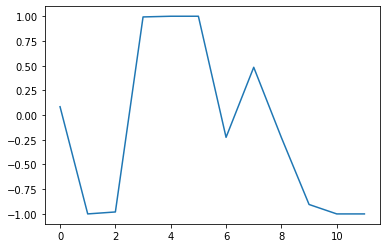

In [9]:
corr = []
for i in range(len(cleanedAccuracy)):
    if (len(cleanedSilhouette[i]) > 2):
        corr.append(np.corrcoef(cleanedAccuracy[i],cleanedSilhouette[i])[0,1])
        if (np.isnan(np.corrcoef(cleanedAccuracy[i],cleanedSilhouette[i])[0,1])):
            print("nan corrcoef")
            print(cleanedAccuracy[i])
            print(cleanedSilhouette[i])
'''
plt.plot(np.abs(corr))
print("mean")
print(np.nanmean(np.array(corr)**2))
'''

plt.plot(corr)
print("mean")
print(np.nanmean(corr))

mean
0.6757228187256054


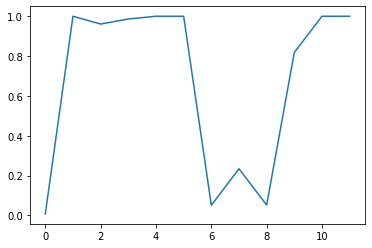

In [10]:
reg = []
from sklearn.linear_model import LinearRegression
for i in range(len(cleanedAccuracy)):
    if (len(cleanedSilhouette[i]) > 2):
        X = np.array(cleanedAccuracy[i]).reshape((len(cleanedAccuracy[i])),1)
        y = np.array(cleanedSilhouette[i]).reshape((len(cleanedSilhouette[i])),1)
        linReg = LinearRegression().fit(X, y)
        reg.append(linReg.score(X,y))

plt.plot(reg)
print("mean")
print(np.nanmean(reg))

### Multi

In [11]:
# Accuracy
accuracy = np.genfromtxt(os.path.join('Table accuracy.csv'),delimiter=';')
accuracy = np.array(accuracy,dtype='float') # Convert into array
accuracy = np.nan_to_num(accuracy)

nbClust = 5
cleanedAccuracy = []
acc = []
accuracy = accuracy[2:,5:9]

for mod in range(4):
    for i in range(3):
        acc = []
        for j in range(nbClust):
            if (accuracy[i*5+j,mod] != 0):
                acc.append(accuracy[i*5+j,mod])
        cleanedAccuracy.append(acc)
        
        
# Silhouette
silhouette = np.genfromtxt(os.path.join('Table silhouette.csv'),delimiter=';')
silhouette = np.array(silhouette,dtype='float') # Convert into array
silhouette = np.nan_to_num(silhouette)

nbClust = 5
cleanedSilhouette = []
sil = []
silhouette = silhouette[2:,5:9]

for mod in range(4):
    for i in range(3):
        sil = []
        for j in range(nbClust):
            if (silhouette[i*5+j,mod] != 0):
                sil.append(silhouette[i*5+j,mod])
        
        cleanedSilhouette.append(sil)

nan corrcoef
[81.0, 81.0, 81.0]
[0.614, 0.614, 0.614]
nan corrcoef
[85.0, 85.0, 85.0]
[0.662, 0.662, 0.662]
mean
-0.17818190102764758


//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


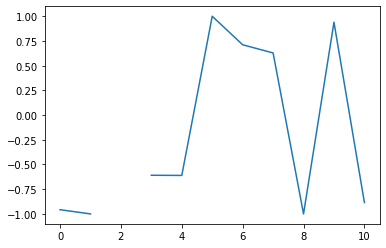

In [12]:
corr = []
for i in range(len(cleanedAccuracy)):
    if (len(cleanedSilhouette[i]) > 2):
        corr.append(np.corrcoef(cleanedAccuracy[i],cleanedSilhouette[i])[0,1])
        if (np.isnan(np.corrcoef(cleanedAccuracy[i],cleanedSilhouette[i])[0,1])):
            print("nan corrcoef")
            print(cleanedAccuracy[i])
            print(cleanedSilhouette[i])
'''
plt.plot(np.abs(corr))
print("mean")
print(np.nanmean(np.array(corr)**2))
'''

plt.plot(corr)
print("mean")
print(np.nanmean(corr))

## Misclassified

Often misclassified : 
[ 7 25 14 21 22 16 11  9 17 18 19]


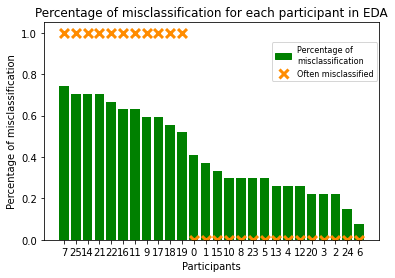

In [76]:
case = "EEG"
case = "EDA"
#case = "IBI"
#case = "EEG_EDA"
#case = "EEG_IBI"
#case = "EEG_EDA_IBI"

sort = True
#sort = False

# Read table
results = np.genfromtxt(os.path.join('Table misclassified %s.csv' %case),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)

misclassified = results[2:-1,2:28]
nbMeth = np.sum(np.sum(misclassified,axis=1)>0)
propMisClassified = np.sum(misclassified,axis=0)/nbMeth
subjects = np.arange(0,26)

fig, ax = plt.subplots()

if (sort):
    subjectsSorted = subjects[np.argsort(propMisClassified)][::-1]
    propMisClassified[::-1].sort()
    plt.xticks(subjects)
    ax.set_xticklabels(subjectsSorted)
    
plt.bar(subjects,propMisClassified,zorder=1,color='green')
plt.scatter(subjects,propMisClassified>0.5,marker='x',zorder=2,s=80,color='darkorange',linewidth=3)
plt.xlabel('Participants')
plt.ylabel('Percentage of misclassification')
plt.title("Percentage of misclassification for each participant in %s" %case)
percentage = mpatches.Patch(color='green',label='Percentage of\nmisclassification')
often = Line2D([], [], color='darkorange', marker='x', linestyle='None',
                              markersize=9,markeredgewidth=3, label='Often misclassified')
plt.legend(handles=[percentage,often],prop={'size': 8},loc=(0.68,0.73))
plt.savefig(os.path.join('figures','misclassified%s.png' %case),bbox_inches='tight')

print("Often misclassified : ")
print(subjectsSorted[propMisClassified>0.5])